# 분류 연습 : 날씨 분류

- 데이터 출처 : https://www.kaggle.com/datasets/ananthr1/weather-prediction

- 데이터 설명 : 시애틀 도시의 일부 기상 조건을 사용하여 비가 올지 여부를 예측

- 파일 이름 : 'seattle-weather.csv'

- 컬럼 정보
    * **date** : 날짜
    * **precipitation** : 비, 진눈깨비, 눈, 우박, 이슬비 등으로 지표면에 물이 떨어지고 개방된 수역이 형성되는 모든 형태
    * **temp_max** : 최고 온도
    * **temp_min** : 최저 온도
    * **wind** : 풍속
    * **weather** : target, 5가지 분류 - drizzle(이슬비), rain(비), sun(햇살), snow(눈), fog(안개)

- 두 가지 모두 진행
    * 이진 분류 : 맑은 날(good), 흐린 날(bad)
    * 다중 분류 : drizzle(이슬비), rain(비), sun(햇살), snow(눈), fog(안개)

## 진행 순서
1. 필요한 라이브러리 설치 및 임포트
2. 데이터 로드
3. 데이터 분석(구성확인, 상관분석, 시각화)
4. 데이터 전처리(결측치 처리, 인코딩 등)
5. 데이터 분리(x, y)
6. 데이터 스케일링(정규화)
7. 머신러닝
8. 딥러닝
9. 모델 성능평가

# 1. 필요한 라이브러리 설치 및 임포트

In [1]:
!pip install sklearn

In [2]:
import sklearn as sk

In [3]:
import pandas as pd
import numpy as np

# 2. 데이터 로드

In [4]:
df = pd.read_csv('seattle_weather.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [5]:
df2 = pd.read_csv('seattle_weather_binary.csv')
df2

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,bad
1,2012-01-02,10.9,10.6,2.8,4.5,bad
2,2012-01-03,0.8,11.7,7.2,2.3,bad
3,2012-01-04,20.3,12.2,5.6,4.7,bad
4,2012-01-05,1.3,8.9,2.8,6.1,bad
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,bad
1457,2015-12-28,1.5,5.0,1.7,1.3,bad
1458,2015-12-29,0.0,7.2,0.6,2.6,bad
1459,2015-12-30,0.0,5.6,-1.0,3.4,good


# 3. 데이터 분석(구성확인, 상관분석, 시각화)

### (1) 구성확인

In [6]:
#데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1457 non-null   float64
 3   temp_min       1456 non-null   float64
 4   wind           1459 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [7]:
#데이터 (행,열) 크기 확인
df.shape

(1461, 6)

In [8]:
#데이터 전체 컬럼명 보기
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [9]:
#데이터 전체 행 보기
df.values

array([['2012-01-01', 0.0, 12.8, 5.0, 4.7, 'drizzle'],
       ['2012-01-02', 10.9, 10.6, 2.8, 4.5, 'rain'],
       ['2012-01-03', 0.8, 11.7, 7.2, 2.3, 'rain'],
       ...,
       ['2015-12-29', 0.0, 7.2, 0.6, 2.6, 'fog'],
       ['2015-12-30', 0.0, 5.6, -1.0, 3.4, 'sun'],
       ['2015-12-31', 0.0, 5.6, -2.1, 3.5, 'sun']], dtype=object)

In [10]:
#데이터 상위/하위 5행 출력
df.head(), df.tail()

(         date  precipitation  temp_max  temp_min  wind  weather
 0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
 1  2012-01-02           10.9      10.6       2.8   4.5     rain
 2  2012-01-03            0.8      11.7       7.2   2.3     rain
 3  2012-01-04           20.3      12.2       5.6   4.7     rain
 4  2012-01-05            1.3       8.9       2.8   6.1     rain,
             date  precipitation  temp_max  temp_min  wind weather
 1456  2015-12-27            8.6       4.4       1.7   2.9    rain
 1457  2015-12-28            1.5       5.0       1.7   1.3    rain
 1458  2015-12-29            0.0       7.2       0.6   2.6     fog
 1459  2015-12-30            0.0       5.6      -1.0   3.4     sun
 1460  2015-12-31            0.0       5.6      -2.1   3.5     sun)

In [11]:
#데이터 통계 보기
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1457.000000,1456.000000,1459.000000
mean,3.029432,16.456417,8.238255,3.242975
std,6.680194,7.351736,5.025737,1.437146
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [12]:
#중앙값(숫자형)
df['temp_max'].median()

15.6

In [13]:
#컬럼 내 각각의 값 분포 -> 제일 위 값이 최빈값
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [14]:
#전체
# [df[c].value_counts() for c in df.columns]

In [15]:
#특정 컬럼 내 각각의 값 분포 비율
df['weather'].value_counts(normalize=True)

weather
rain       0.438741
sun        0.438056
fog        0.069131
drizzle    0.036277
snow       0.017796
Name: proportion, dtype: float64

In [16]:
#특정 컬럼 내 유일한 값 확인
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [17]:
#데이터 결측치(null값) 확인
df.isna().sum()

date             0
precipitation    0
temp_max         4
temp_min         5
wind             2
weather          0
dtype: int64

In [18]:
#데이터 타입 확인
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

### (2) 상관분석

In [19]:
#두 변수간 상관 관계 분석
df.corr(numeric_only=True)

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.227641,-0.073186,0.327891
temp_max,-0.227641,1.000000,0.875376,-0.165840
temp_min,-0.073186,0.875376,1.000000,-0.075492
wind,0.327891,-0.165840,-0.075492,1.000000


### (3) 시각화

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')  # 한글 폰트 적용 : windows -> Malgun Gothic

C:\Users\user\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


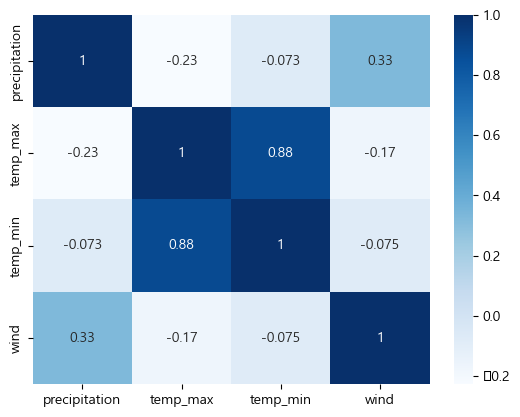

In [21]:
#히트맵(Heatmap)
sns.heatmap(df.corr(numeric_only=True), cmap="Blues", annot=True)
plt.show()

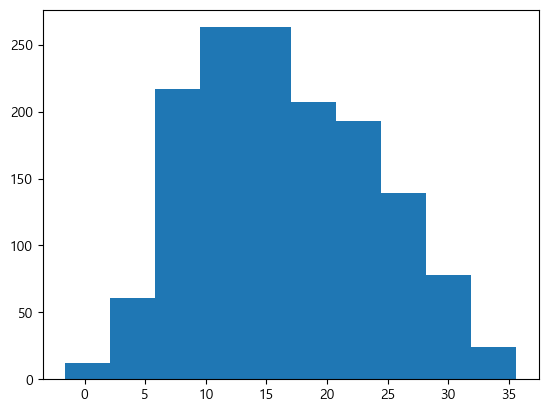

In [22]:
#히스토그램 그리기
plt.hist(df['temp_max'])
plt.show()

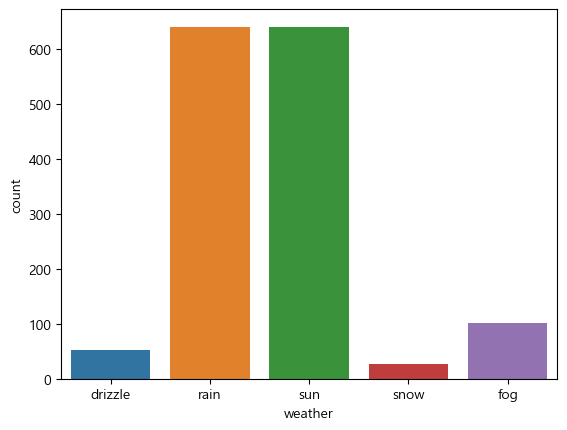

In [23]:
# 범주형 컬럼 - countplot
import seaborn as sns
sns.countplot(x='weather', data=df)
plt.show()

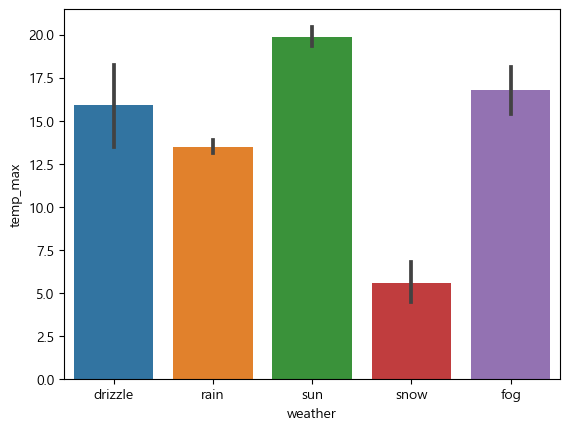

In [24]:
# barplot
sns.barplot(data=df, y='temp_max', x='weather')
plt.show()

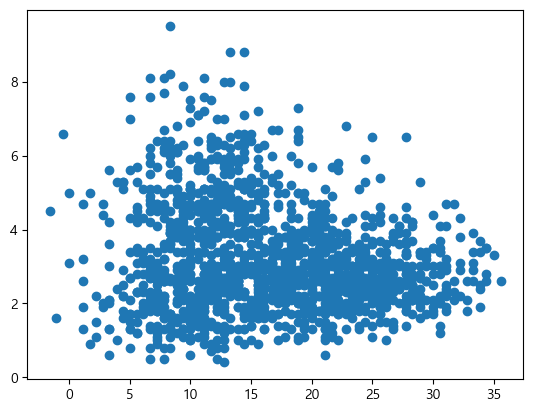

In [25]:
# scatterplot
plt.scatter(df['temp_max'], df['wind'])
plt.show()

In [26]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

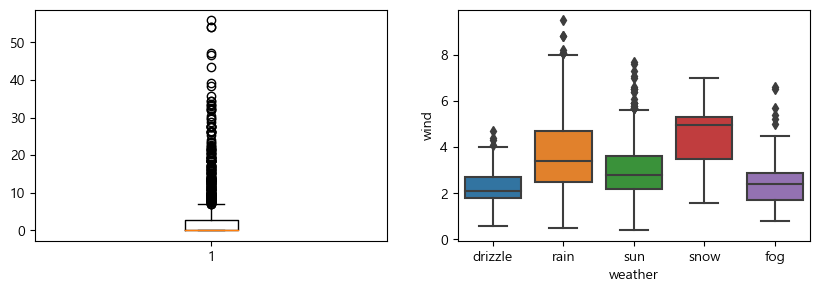

In [27]:
# boxplot
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.boxplot(df['precipitation'])

plt.subplot(1, 2, 2)
sns.boxplot(y='wind', x='weather', data=df)
plt.show()

# 4. 데이터 전처리(결측치 처리, 인코딩 등)

### (1) 결측치 처리

In [28]:
df.isna().sum()

date             0
precipitation    0
temp_max         4
temp_min         5
wind             2
weather          0
dtype: int64

In [29]:
df['temp_max'].mean()

16.456417295813313

In [30]:
# 채우기 - 특정 값
# df.fillna(0)  # 전체 null 값 한 번에 채우기
df['temp_max'].fillna(16, inplace=True)
df2['temp_max'].fillna(16, inplace=True)

In [31]:
# 채우기 - 평균, 중앙 값
df['temp_min'].fillna(df['temp_min'].mean(), inplace=True)
df2['temp_min'].fillna(df['temp_min'].median(), inplace=True)

In [32]:
# 채우기 - 앞, 뒤
df['temp_max'].fillna(method='ffill', inplace=True)
df2['temp_max'].fillna(method='bfill', inplace=True)

In [33]:
# 삭제 - 행, 열
df.drop('date', axis=1, inplace=True)  # 열 삭제
df.dropna(inplace=True)  # null 값이 존재하는 행 전체 삭제
df2.dropna(inplace=True)

In [34]:
df.isna().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

# 5. 데이터 분리(x, y)

### (1) 데이터 분리

In [35]:
target = 'weather'
X = df.drop(target, axis=1)
y = df[target]

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1167, 4) (292, 4) (1167,) (292,)


### (2) 인코딩

In [38]:
# 라벨인코딩
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train_en = encoder.fit_transform(y_train)
y_train_en = encoder.fit_transform(y_test)

In [39]:
# 원핫인코딩
y_train_one = pd.get_dummies(data=y_train, columns=['weather'], drop_first=True, dtype=int)
y_test_one = pd.get_dummies(data=y_test, columns=['weather'], drop_first=True, dtype=int)
y_train.head()

254     sun
1067    sun
866     sun
800     fog
380     sun
Name: weather, dtype: object

# 6. 데이터 스케일링(정규화)

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# 7. 머신러닝

In [42]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train_s, y_train)

LogisticRegression()

In [43]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train_s, y_train)

KNeighborsClassifier()

In [44]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth=10, random_state=42)
model3.fit(X_train_s, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [45]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=3, random_state=42)
model4.fit(X_train_s, y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [48]:
# XGBoost
from xgboost import XGBClassifier
model5 = XGBClassifier(n_estimators=3, random_state=42)
model5.fit(X_train_s, y_train_one)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=3, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [49]:
# Light GBM
from lightgbm import LGBMClassifier
model6 = LGBMClassifier(n_estimators=3, random_state=42)
model6.fit(X_train_s, y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 248
[LightGBM] [Info] Number of data points in the train set: 1167, number of used features: 4
[LightGBM] [Info] Start training from score -3.278002
[LightGBM] [Info] Start training from score -2.758127
[LightGBM] [Info] Start training from score -0.810288
[LightGBM] [Info] Start training from score -4.171820
[LightGBM] [Info] Start training from score -0.823867
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(n_estimators=3, random_state=42)

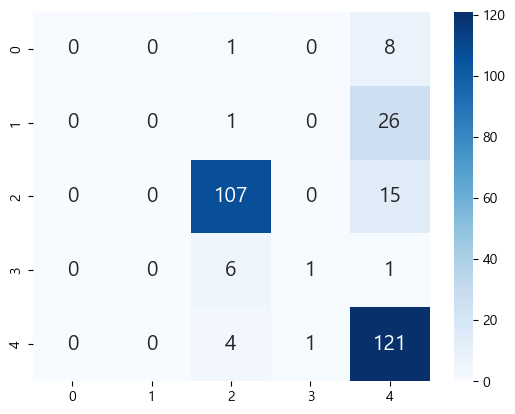

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         9
         fog       0.00      0.00      0.00        27
        rain       0.90      0.88      0.89       122
        snow       0.50      0.12      0.20         8
         sun       0.71      0.96      0.81       126

    accuracy                           0.78       292
   macro avg       0.42      0.39      0.38       292
weighted avg       0.69      0.78      0.73       292



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
from sklearn.metrics import *
y_pred1 = model1.predict(X_test_s)
sns.heatmap(confusion_matrix(y_test, y_pred1), 
            annot=True, 
            cmap='Blues', 
            fmt='d', 
            annot_kws={'size':15})
plt.show()
print(classification_report(y_test, y_pred1))

# 8. 딥러닝

### (0). 기본 제공 라이브러리

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)

### (1) 모델1 : Input, Dense

In [53]:
X_train.shape

(1167, 4)

In [66]:
# 모델 생성
model1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    
    Dense(4, activation='softmax')
])

#모델 컴파일 optimizer 설정 -> loss:손실함수, metrics:평가기준
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
#다중분류
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc']) #원핫인코딩된 경우
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc']) #원핫인코딩 안된 경우
#회귀
#model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])

model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                320       
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 32)                1056      
                                                                 
 dense_24 (Dense)            (None, 4)                 132       
                                                                 
Total params: 7748 (30.27 KB)
Trainable params: 7748 (30.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
y_train_one

,fog,rain,snow,sun
254,0,0,0,1
1067,0,0,0,1
866,0,0,0,1
800,1,0,0,0
380,0,0,0,1
...,...,...,...,...
1097,0,1,0,0
1132,0,1,0,0
1296,0,0,0,1
862,0,0,0,1


In [80]:
# 학습
es = EarlyStopping(monitor='val_loss', patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

hist = model1.fit(X_train_s, y_train_one, 
                    batch_size=10, epochs=10, 
                    validation_data=(X_train_s, y_train_one), 
                    callbacks=[es, mc], verbose=1)

Epoch 1/10
117/117 [==============================] - 1s 6ms/step - loss: 333.3453 - acc: 0.4644 - val_loss: 181.5234 - val_acc: 0.6281
Epoch 2/10
 45/117 [==========>...................] - ETA: 0s - loss: 391.4804 - acc: 0.4822

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


117/117 [==============================] - 1s 5ms/step - loss: 484.5807 - acc: 0.4722 - val_loss: 1175.6837 - val_acc: 0.4387
Epoch 3/10
117/117 [==============================] - 1s 6ms/step - loss: 782.8256 - acc: 0.4867 - val_loss: 2672.2231 - val_acc: 0.4387
Epoch 4/10
117/117 [==============================] - 1s 6ms/step - loss: 1479.2742 - acc: 0.4336 - val_loss: 971.7394 - val_acc: 0.4781
Epoch 5/10
117/117 [==============================] - 1s 5ms/step - loss: 1122.8085 - acc: 0.4473 - val_loss: 723.3770 - val_acc: 0.5981


### (2) 모델2 : Dense, Input, Activation, Dropout, BatchNormalization

In [103]:
# 모델 생성
model2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(4, activation='softmax')
])

#모델 컴파일 optimizer 설정 -> loss:손실함수, metrics:평가기준
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
#다중분류
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc']) #원핫인코딩된 경우
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc']) #원핫인코딩 안된 경우
#회귀
#model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])

model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 64)                320       
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization_5 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 64)               

In [98]:
y_train.value_counts()

weather
rain       519
sun        512
fog         74
drizzle     44
snow        18
Name: count, dtype: int64

In [ ]:
# 학습
es = EarlyStopping(monitor='val_loss', patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

y_train_encoded = to_categorical(y_train, num_classes=4)

history = model2.fit(X_train_s, y_train_one, 
                    batch_size=10, epochs=10, 
                    validation_data=(X_train_s, y_train_one), 
                    callbacks=[es, mc], verbose=1)

# 9. 모델 성능평가

### (1) 모델 정확도/손실 그래프 그리기

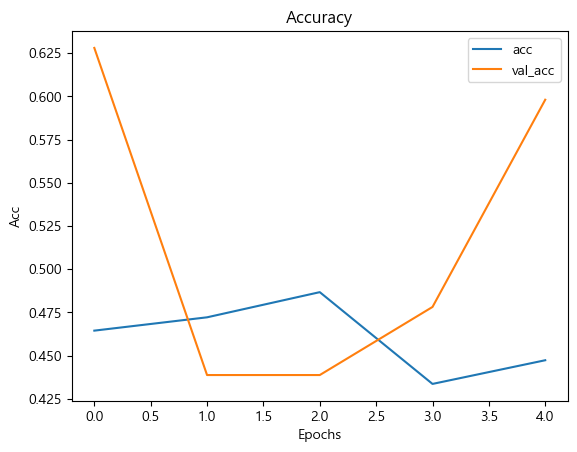

In [81]:
#Accurracy 그래프 그리기
plt.title('Accuracy')

plt.plot(hist.history['acc'], label='acc')
plt.plot(hist.history['val_acc'], label='val_acc')

plt.xlabel('Epochs')
plt.ylabel('Acc')

plt.legend()
plt.show()

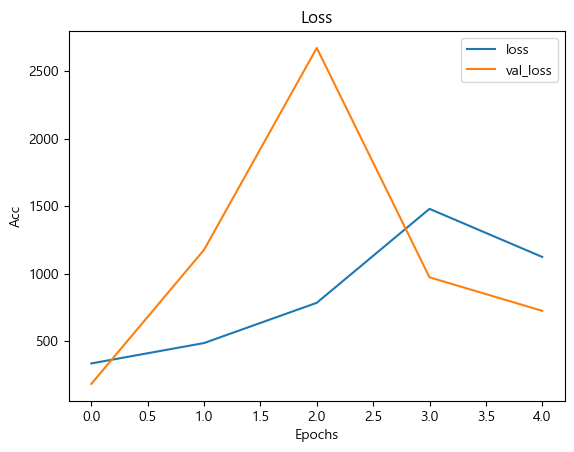

In [82]:
#Loss 그래프 그리기
plt.title('Loss')

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')

plt.xlabel('Epochs')
plt.ylabel('Acc')

plt.legend()
plt.show()

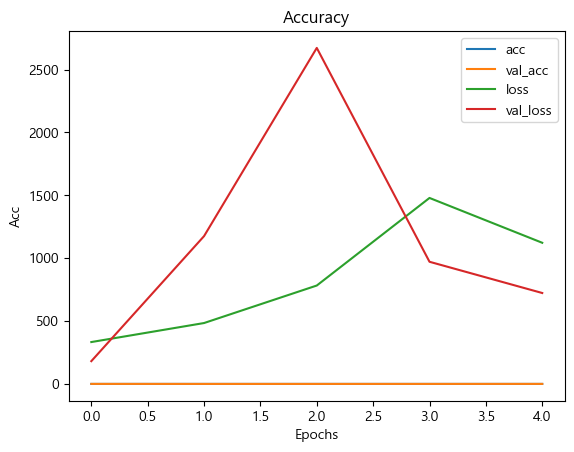

In [83]:
#두개 다 합친 그래프
plt.title('Accuracy')

plt.plot(hist.history['acc'], label='acc')
plt.plot(hist.history['val_acc'], label='val_acc')

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')

plt.xlabel('Epochs')
plt.ylabel('Acc')

plt.legend()
plt.show()

### (2) 평가 지표 출력

In [84]:
from sklearn.metrics import *

In [ ]:
#Confusion Matrix
confusion_matrix(y_test, y_pred)

In [ ]:
#Accuracy(정확도)
accuracy_score(y_test, y_pred)

In [ ]:
#Classification Report(평가지표-Precision, Recall, F1 한 번에 출력)
classification_report(y_test, y_pred)